In [292]:
# Load stock.csv and do a quick sanity check
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [293]:
df = pd.read_csv('weatherAUS.csv.')
df.dtypes

Date                 str
Location             str
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir          str
WindGustSpeed    float64
WindDir9am           str
WindDir3pm           str
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday            str
RISK_MM          float64
RainTomorrow         str
dtype: object

In [294]:
df.shape

(142193, 24)

In [295]:
df.info

<bound method DataFrame.info of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W

In [296]:
print(df.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8

In [297]:
print(df.isna().sum())


Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64


In [298]:

# Convert Date 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


#  Numeric Columns 
num_cols = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
    'Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Pressure3pm',
    'Cloud9am', 'Cloud3pm',
    'Temp9am', 'Temp3pm',
    'RISK_MM'
]

#  Categorical Columns 
cat_cols = [
    'Location',
    'WindGustDir', 'WindDir9am', 'WindDir3pm',
    'RainToday', 'RainTomorrow'
]


for col in num_cols + cat_cols:
    mode_val = df[col].mode(dropna=True)
    if not mode_val.empty:
        df[col] = df[col].fillna(mode_val[0])



print(df.isnull().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


In [299]:
string_cols = ['RainToday', 'RainTomorrow']

for col in string_cols:
    mode_val = df[col].mode(dropna=True)
    if not mode_val.empty:
        df[col] = df[col].fillna(mode_val[0])

print(df.isnull().sum())


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


In [300]:
df.duplicated().sum()

np.int64(0)

In [301]:
df['Date'] = pd.to_datetime(df['Date'])

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,4.0,0.0,W,44.0,W,...,8.0,7.0,16.9,21.8,No,0.0,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,...,7.0,7.0,17.2,24.3,No,0.0,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,...,7.0,2.0,21.0,23.2,No,0.0,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,...,7.0,7.0,18.1,26.5,No,1.0,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,0.2,No,5,12,2008


In [302]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

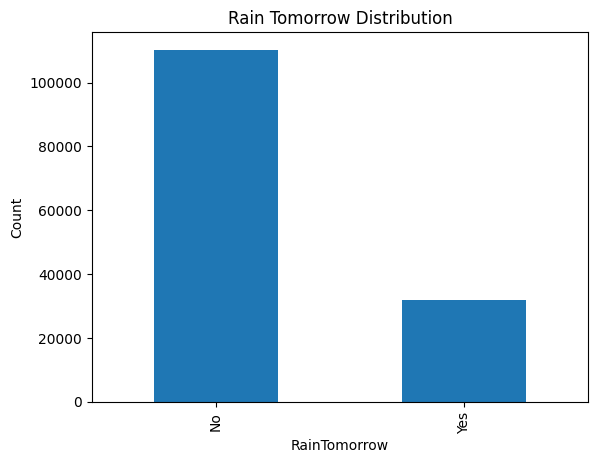

In [303]:
import matplotlib.pyplot as plt

df['RainTomorrow'].value_counts().plot(kind='bar')
plt.xlabel("RainTomorrow")
plt.ylabel("Count")
plt.title("Rain Tomorrow Distribution")
plt.show()

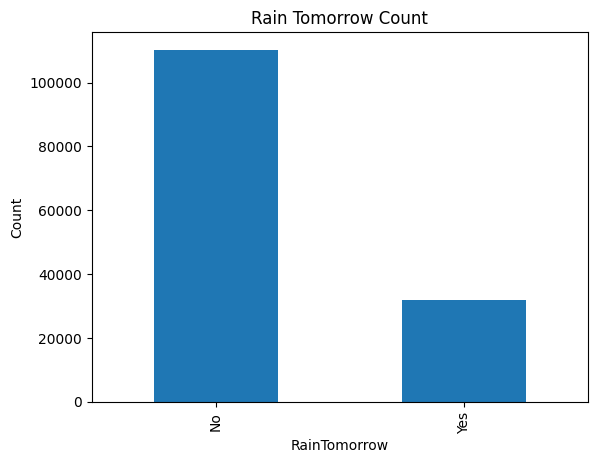

In [304]:

# RainTomorrow countplot
df['RainTomorrow'].value_counts().plot(kind='bar')
plt.title("Rain Tomorrow Count")
plt.xlabel("RainTomorrow")
plt.ylabel("Count")
plt.show()

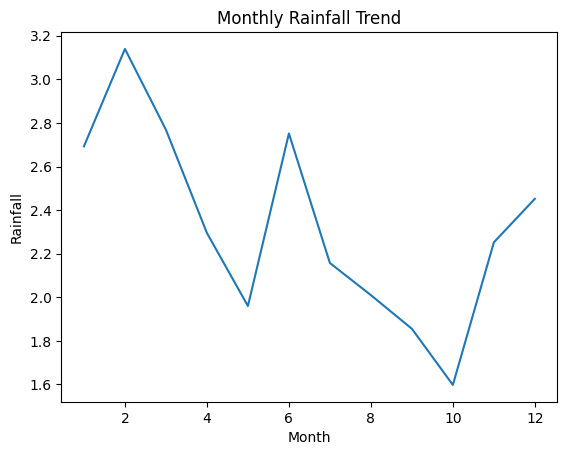

In [305]:
# Monthly rainfall trend
df.groupby('Month')['Rainfall'].mean().plot()
plt.title("Monthly Rainfall Trend")
plt.xlabel("Month")
plt.ylabel("Rainfall")
plt.show()


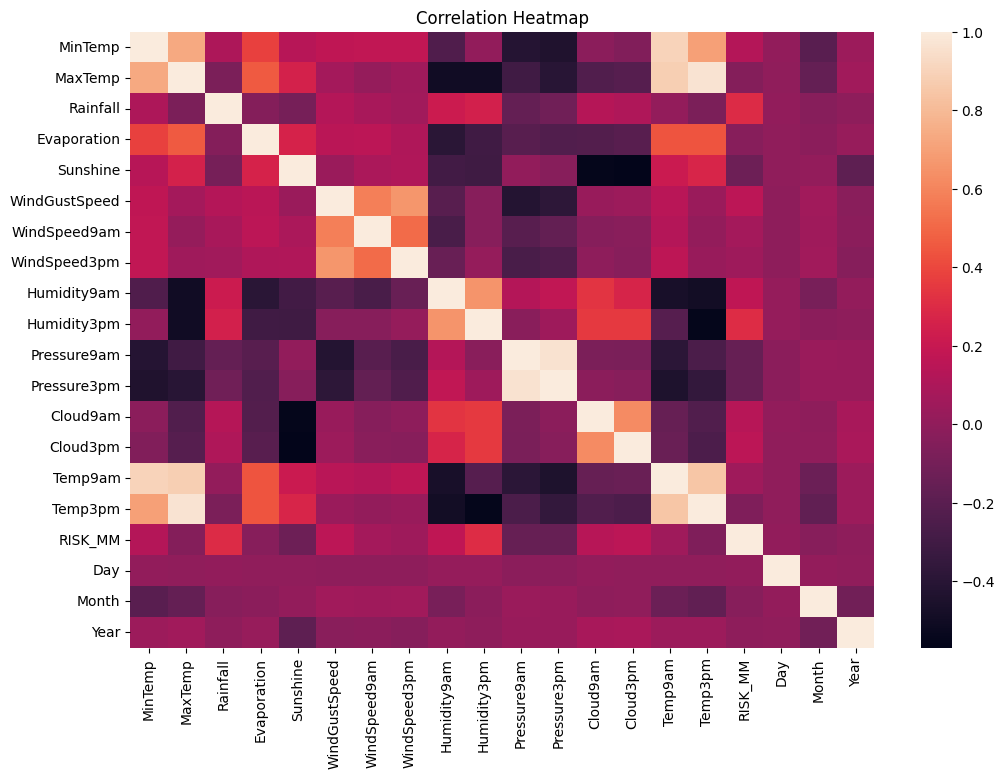

In [306]:

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=False)
plt.title("Correlation Heatmap")
plt.show()


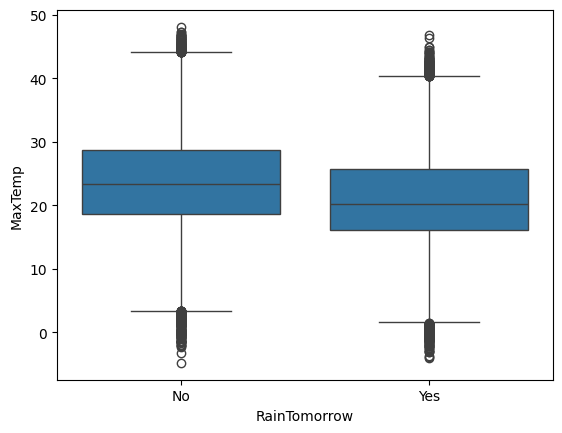

In [307]:
# Boxplot example
sns.boxplot(x='RainTomorrow', y='MaxTemp', data=df)
plt.show()

In [308]:
#  Numeric Columns 
num_cols = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
    'Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Pressure3pm',
    'Cloud9am', 'Cloud3pm',
    'Temp9am', 'Temp3pm',
    'RISK_MM'
]

#  Categorical Columns 
cat_cols = [
    'Location',
    'WindGustDir', 'WindDir9am', 'WindDir3pm',
    'RainToday', 'RainTomorrow'
]


# FILL USING MODE (SAFE WAY)

for col in num_cols + cat_cols :
    mode_val = df[col].mode(dropna=True)
    if not mode_val.empty:
        df[col] = df[col].fillna(mode_val[0])


In [309]:
df = df.dropna()

In [310]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

if len(df) == 0:
    print("Error: DataFrame is empty. Please check your data source.")
else:
    # Convert target
    df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
    df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
    
    # Keep only numeric for ML
    df_model = df.select_dtypes(include='number')
    
    # Check if we have the target column
    if 'RainTomorrow' not in df_model.columns:
        print("Error: 'RainTomorrow' column not found in numeric columns. Check data types.")
    else:
        X = df_model.drop('RainTomorrow', axis=1)
        y = df_model['RainTomorrow']
        
        # Check if we have data to split
        if len(X) > 0:
            # Train test split
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Model
            model = RandomForestClassifier()
            model.fit(X_train, y_train)
            
            pred = model.predict(X_test)
            
            # Results
            print("\nAccuracy:", accuracy_score(y_test, pred))
            print("\nClassification Report:\n", classification_report(y_test, pred))
            
            # FEATURE IMPORTANCE
            importance = pd.Series(model.feature_importances_, index=X.columns)
            print("\nTop Important Features:\n", importance.sort_values(ascending=False).head(10))
        else:
            print("Error: No data available for modeling after preprocessing.")


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22098
           1       1.00      1.00      1.00      6341

    accuracy                           1.00     28439
   macro avg       1.00      1.00      1.00     28439
weighted avg       1.00      1.00      1.00     28439


Top Important Features:
 RISK_MM          0.798240
Humidity3pm      0.071140
Rainfall         0.024114
Cloud3pm         0.016551
RainToday        0.014879
Sunshine         0.012961
Humidity9am      0.011786
WindGustSpeed    0.009788
Pressure3pm      0.009057
Pressure9am      0.008911
dtype: float64


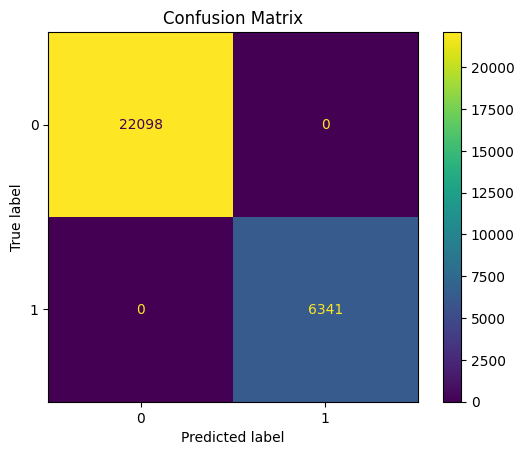

In [311]:
# 1️⃣ CONFUSION MATRIX

cm = confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

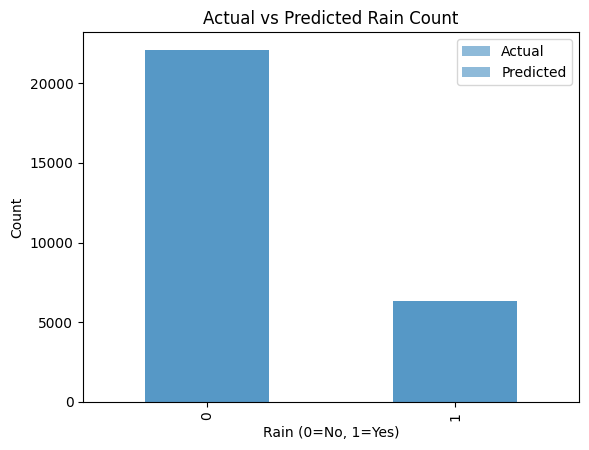

In [312]:
# 2️⃣ ACTUAL vs PREDICTED BAR CHART

plt.figure()

pd.Series(y_test).value_counts().sort_index().plot(kind='bar', alpha=0.5, label='Actual')
pd.Series(pred).value_counts().sort_index().plot(kind='bar', alpha=0.5, label='Predicted')

plt.legend()
plt.title("Actual vs Predicted Rain Count")
plt.xlabel("Rain (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()



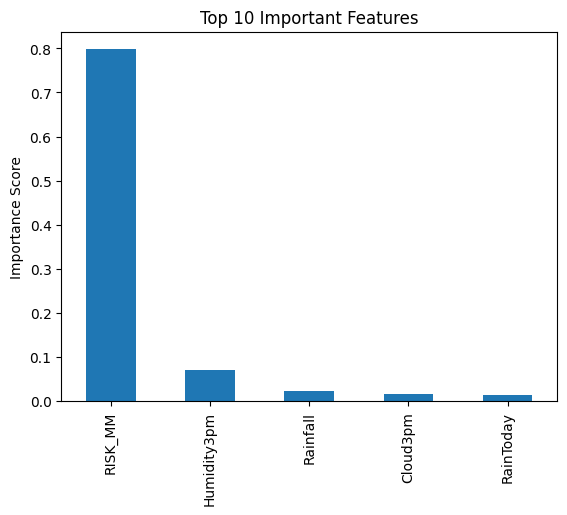

In [313]:
# 3️⃣ FEATURE IMPORTANCE

importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(5).plot(kind='bar')

plt.title("Top 10 Important Features")
plt.ylabel("Importance Score")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Sample data for demonstration
df = pd.DataFrame({
    'RainToday': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'RainTomorrow': ['No', 'Yes', 'Yes', 'No', 'Yes'],
    'Temperature': [25.5, 30.2, 22.1, 28.4, 26.7],
    'Humidity': [80, 65, 90, 70, 85]
})

# ---------------------------
# Encode target
# ---------------------------
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes':1, 'No':0})
df['RainToday'] = df['RainToday'].map({'Yes':1, 'No':0})

# ---------------------------
# Prepare features - handle missing data BEFORE filtering
# ---------------------------
df_model = df.select_dtypes(include='number')

# Check if we have data
print(f"Shape of numerical data: {df_model.shape}")

# Fill NaN values BEFORE dropping rows
df_model = df_model.fillna(df_model.mean())

# Drop rows with NaN values in the target variable
df_model = df_model.dropna(subset=['RainTomorrow'])

# Check if we still have data after cleaning
print(f"Shape after cleaning: {df_model.shape}")
if df_model.empty:
    raise ValueError("Dataset is empty after preprocessing. Check your data source.")

X = df_model.drop('RainTomorrow', axis=1)
y = df_model['RainTomorrow']

# Modified train_test_split to handle small dataset
# Using a smaller test_size to ensure train set is not empty
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# Train model
# ---------------------------
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# ---------------------------
# Convert to DataFrame for plotting
# ---------------------------
plot_df = y_test.reset_index(drop=True).to_frame(name='Actual')
plot_df['Predicted'] = y_pred

# ---------------------------
# LINE PLOT
# ---------------------------
plt.figure(figsize=(12,5))

sns.lineplot(data=plot_df['Actual'], label='Actual')
sns.lineplot(data=plot_df['Predicted'], label='Predicted')

plt.title("Rain Prediction: Actual vs Predicted")
plt.xlabel("Samples")
plt.ylabel("Rain (0 = No, 1 = Yes)")
plt.legend()

plt.show()